In [1]:
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns
import json

In [2]:
df=pd.read_json('inputJson2.txt')
df.head()

,SESSIONNUMBER,SESSIONTYPE,Checks
0,1916105,EA,"{'ID': '00083', 'Text': 'Define Session Scope'..."
1,1916105,EA,"{'ID': '00089', 'Text': 'Detailed Session Scop..."
2,1916105,EA,"{'ID': '00084', 'Text': 'Landscape', 'Instance..."
3,1916105,EA,"{'ID': '00086', 'Text': 'Products and Componen..."
4,1916105,EA,"{'ID': '00087', 'Text': 'Servers in current La..."


In [3]:
product_data=pd.DataFrame(
    {
        'Version_Count':[],
        'Version_Index':[],
        'Product_Name':[]
    }, columns=['Version_Count', 'Version_Index', 'Product_Name']
)
version_count=[]
product_name=[]
version_index=[]

In [4]:
df['SESSIONNUMBER'][0]

1916105

In [4]:
products=df['Checks'][3]['Data']['Master Table: Product&Vers/-2E&Comp/-2E (master for maintenance)']
for product in products:
    if product['SAP Product'] in product_name:
        index = product_name.index(product['SAP Product'])
        if product['Product Version'] in version_index[index]:
            continue
        else:
            version_index[index].append(product['Product Version'])
    else:
        product_name.append(product['SAP Product'])
        version_index.append([product['Product Version']])

In [5]:
for idx in version_index:
    version_count.append(len(idx))

In [6]:
version_index

[['5.0', '6.0', '7.0', '8.0', '9.0', '10.0'],
 ['BOBJ DATA INSIGHT XI 3.0'],
 ['2008', '2011', '2011 V1'],
 ['1.0 ON SAP NW 04', '1.5 ON SAP NW 7.0'],
 ['1.0', '1.1'],
 ['SAP GRC ACCESS CONTROL 5.3'],
 ['2.0', '2.1', '2007', '4.0', '7.0', '7.1'],
 ['3.0A', '3.1'],
 ['2.0', '2.1', '3.0', '3.1', '4.0', '4.2', '5.0'],
 ['7.0', '7.5', '10.0'],
 ['7.0', '7.5', '10.0', '10.1'],
 ['4.0', '4.0 FP3', '4.1', '4.2'],
 ['4.0', '4.1'],
 ['XI R2 ACC'],
 ['4.0', '4.1', '4.2'],
 ['3.1'],
 ['XI 3.0', 'XI 3.1'],
 ['XI 3.1', '4.0', '4.0 FP3', '4.1', '4.2'],
 ['7.0', '7.5', '10.0'],
 ['2008'],
 ['2.0B', '2.1C', '3.0B', '3.1'],
 ['7.0'],
 ['2.0C', '3.0', '3.1', '4.0', '5.0', '5.1', '5.2', '2007', '7.0', '7.00'],
 ['7.01', '7.02', '7.03', '7.04'],
 ['7.12'],
 ['2.0', '3.0'],
 ['2.0B', '2.0C', '3.0'],
 ['SAP ENTERPRISE POS 3.0', 'SAP ENTERPRISE POS 3.1'],
 ['SAP ENTERPRISE POS BASE 3.1'],
 ['5.0', '6.0'],
 ['2004', '6.0'],
 ['6.02', '6.03', '6.04', '6.04/NW7.01', '6.05', '6.06', '6.07', '6.08'],
 ['6.16'],
 

In [7]:
product_name

['BANKING SERVICES FROM SAP',
 'BOBJ DATA INSIGHT',
 'Crystal Reports',
 'DUET',
 'SAP A1N',
 'SAP ACCESS CONTROL',
 'SAP AII',
 'SAP APO',
 'SAP Bank Analyzer',
 'SAP BPC for Microsoft',
 'SAP BPC for SAP Netweaver',
 'SAP BusinessObjects BI Platform',
 'SAP BusinessObjects Dashboards',
 'SAP BusinessObjects Data Integrator',
 'SAP BusinessObjects Data Services',
 'SAP BusinessObjects Edge BI',
 'SAP BusinessObjects Enterprise',
 'SAP BusinessObjects Explorer',
 'SAP BusinessObjects Financial Consolidation',
 'SAP BusinessObjects Xcelsius Enterprise',
 'SAP BW',
 'SAP CPS For SAP Netweaver',
 'SAP CRM',
 'SAP CRM Enhance Package',
 'SAP CRM POWERED BY HANA',
 'SAP E-Recruiting',
 'SAP EBP',
 'SAP ENTERPRISE POS',
 'SAP ENTERPRISE POS BASE',
 'SAP EP',
 'SAP ERP',
 'SAP ERP ENHANCE PACKAGE',
 'SAP ERP POWERED BY HANA',
 'SAP EWM',
 'SAP GTS',
 'SAP HANA PLATFORM EDITION',
 'SAP Landscape Transformation',
 'SAP Master Data Governance',
 'SAP MDM',
 'SAP MII',
 'SAP MOBILE PLATFORM',
 'S

In [8]:
len(product_name)

86

In [9]:
len(version_index)

86

In [10]:
version_count

[6,
 1,
 3,
 2,
 2,
 1,
 6,
 2,
 7,
 3,
 4,
 4,
 2,
 1,
 3,
 1,
 2,
 5,
 3,
 1,
 4,
 1,
 10,
 4,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 8,
 1,
 2,
 10,
 2,
 2,
 1,
 2,
 4,
 2,
 10,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 4,
 2,
 4,
 3,
 1,
 6,
 2,
 5,
 4,
 1,
 16,
 5,
 1,
 6,
 4,
 1,
 6,
 3,
 4,
 2,
 2,
 2,
 5,
 10,
 1,
 3,
 1,
 2,
 1,
 2,
 4,
 13,
 3,
 1,
 3]

In [11]:
product_data['Product_Name']=product_name
product_data['Version_Count']=version_count
product_data['Version_Index']=version_index

In [12]:
product_data.head()

,Version_Count,Version_Index,Product_Name
0,6,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0]",BANKING SERVICES FROM SAP
1,1,[BOBJ DATA INSIGHT XI 3.0],BOBJ DATA INSIGHT
2,3,"[2008, 2011, 2011 V1]",Crystal Reports
3,2,"[1.0 ON SAP NW 04, 1.5 ON SAP NW 7.0]",DUET
4,2,"[1.0, 1.1]",SAP A1N


C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can't multiply sequence by non-int of type 'float'

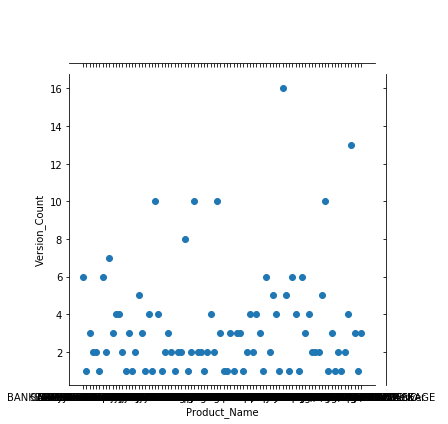

In [13]:
sns.jointplot(x='Product_Name', y='Version_Count', data=product_data)

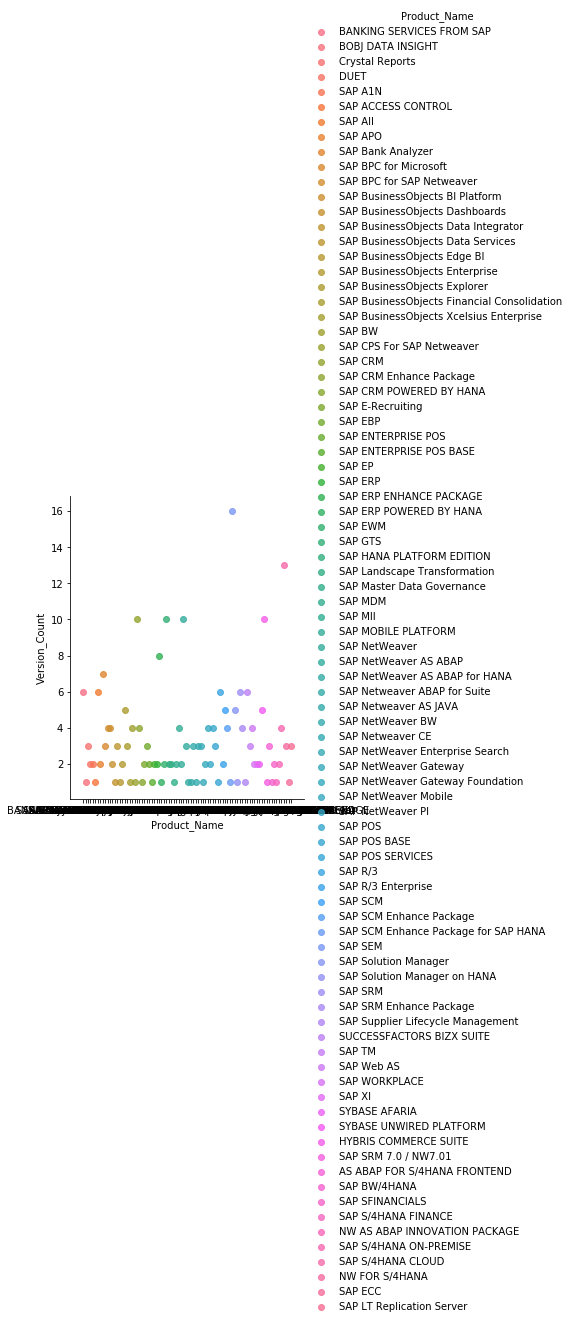

In [15]:
sns.lmplot(x='Product_Name', y= 'Version_Count', data=product_data,
           fit_reg=False, # No regression line
           hue='Product_Name')

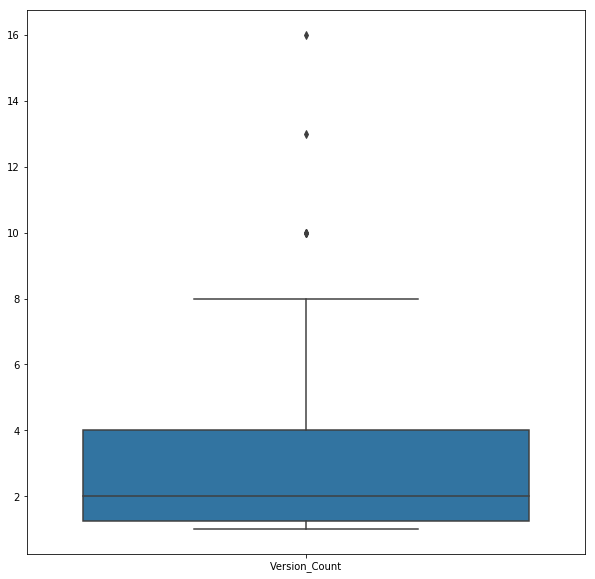

In [16]:
sns.boxplot(data=product_data)

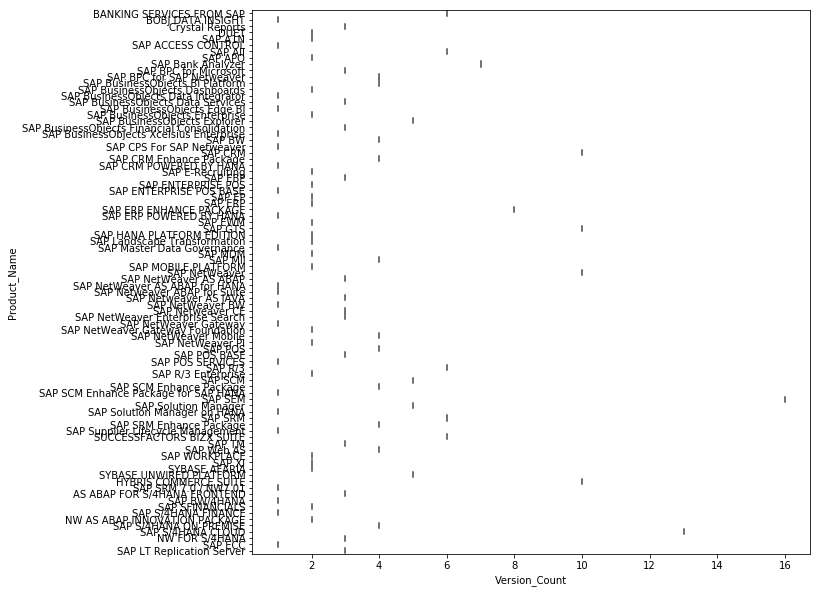

In [20]:
# Violin plot
sns.violinplot(x='Version_Count', y='Product_Name', data=product_data)

In [21]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]


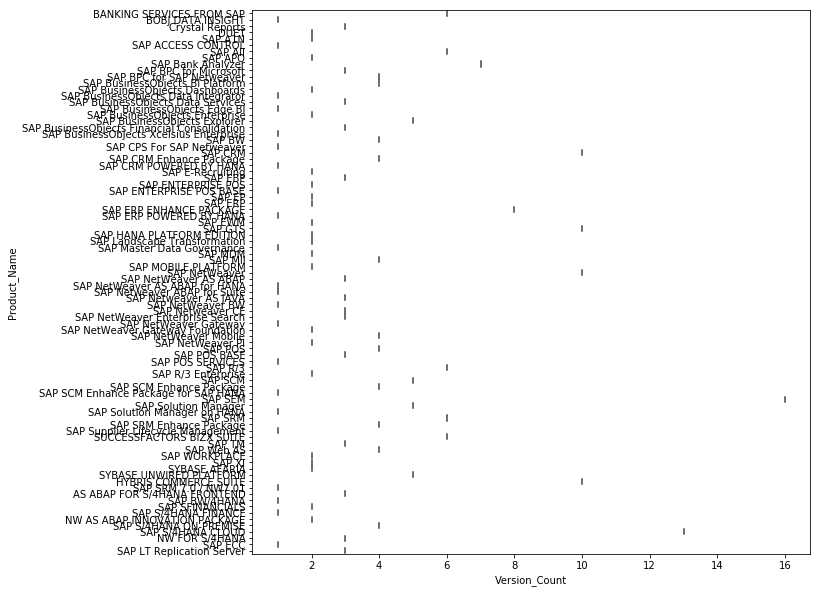

In [23]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Version_Count', y='Product_Name', data=product_data, 
               palette=pkmn_type_colors) # Set color palette

In [24]:
sns.heatmap(product_data)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

C:\Users\I326200\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


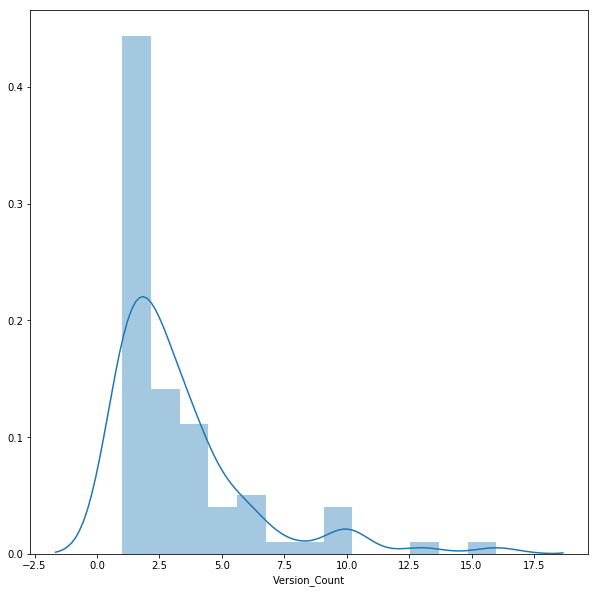

In [25]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(product_data.Version_Count)

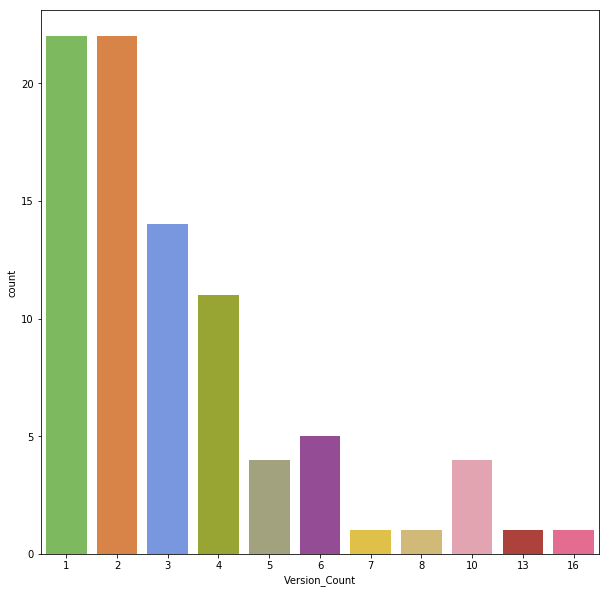

In [26]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Version_Count', data=product_data, palette=pkmn_type_colors)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

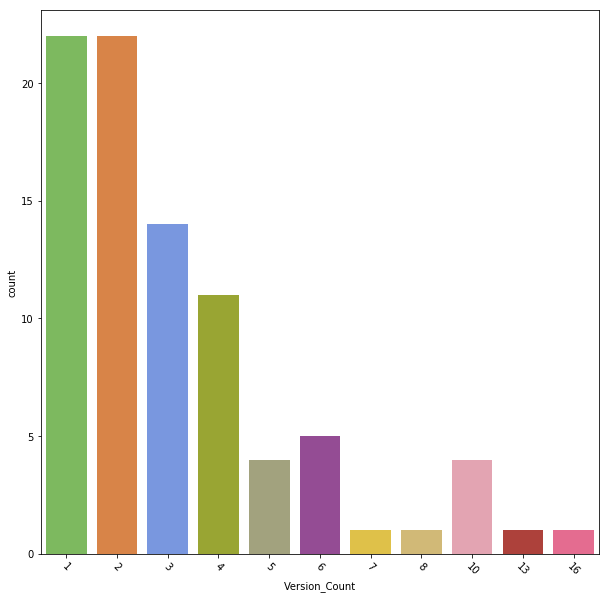

In [27]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Version_Count', data=product_data, palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation=-45)

In [28]:
 Factor Plot
g = sns.factorplot(x='Product_Name', 
                   y='Session_Count', 
                   data=product_data) # Swarmplot

SyntaxError: invalid syntax (<ipython-input-28-b740bfafcd0f>, line 1)

In [ ]:
for indx in df.index:
    data=df['Checks'][indx]['Data']
    products=data['Product Hierarchy']
    for product in products:
        if (str(df['SESSIONNUMBER'][indx])+','+str(product['Product Name'])) in session_index:
            continue
        else:
            session_index.append(str(df['SESSIONNUMBER'][indx])+','+str(product['Product Name']))
            if product['Product Name'] in product_name:
                index=product_name.index(product['Product Name'])
                session_count[index]+=1
            else:
                product_name.append(product['Product Name'])
                session_count.append(1)